In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator, math, statistics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [3]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [4]:
dataset

array([['Argentina', 'FC Barcelona', 94, 94, '€110.5M', '€565K'],
       ['Portugal', 'Juventus', 94, 94, '€77M', '€405K'],
       ['Brazil', 'Paris Saint-Germain', 92, 93, '€118.5M', '€290K'],
       ...,
       ['England', 'Cambridge United', 47, 67, '€60K', '€1K'],
       ['England', 'Tranmere Rovers', 47, 66, '€60K', '€1K'],
       ['England', 'Tranmere Rovers', 46, 66, '€60K', '€1K']],
      dtype=object)

In [5]:
unique, counts = np.unique(dataset[:,0], return_counts=True)
diccionario = dict(zip(unique, counts))

In [6]:
#Creación de variables usadas para el marco de datos normalizedDataset
robustCount = MinMaxScaler().fit_transform(np.array(list(diccionario.values())).reshape(-1,1)).flat[:]
robustCountNormalized = (((robustCount - min(robustCount).reshape(-1,1))).flat[:])

mean = [statistics.geometric_mean(df[df["Nationality"]==pais]["Overall"])for pais in list(diccionario.keys())]
robustMean = (MinMaxScaler().fit_transform(np.array(mean).reshape(-1,1))).flat[:]
robustMeanNormalized = (robustMean - min(robustMean).reshape(-1,1)).flat[:]

In [7]:
#Creación del mejor país simulado
target = max(robustCountNormalized), max(robustMeanNormalized)
target

(1.0, 1.0)

In [8]:
normalizedDataset = pd.DataFrame(data={'Nationality':list(diccionario.keys()), 'Count': diccionario.values(),
                         "Mean": mean, 'RobustCount': robustCount, 'RobustMean': robustMean,
                      'RobustCountNormalized': robustCountNormalized,'RobustMeanNormalized': robustMeanNormalized
                                      })

In [9]:
#Agregando columna de distancias a normalizedDataset
normalizedDataset = normalizedDataset.assign(Distance=[math.sqrt((target[0]-row['RobustCountNormalized'])**2+
                                    (target[1]-row["RobustMeanNormalized"])**2)
                                    for index,row in normalizedDataset.iterrows()])

## Reglas

- Si tiene misma cantidad de jugador, entonces:
- Si tiene mayor promedio, entonces subir
- Si no, entonces bajar
- Si no son iguales:
- Si es mayor en cantidad y mayor en promedio, entonces: 
- Subir posición
- Si es mayor en cantidad y menor en promedio, entonces
- calcular diferencia de promedio con diferencia con jugadores

In [10]:
#Nueva columna para evaluar a los países
# normalizedDataset = normalizedDataset.assign(Distance=[math.sqrt((target[0]-row['RobustCountNormalized'])**2+
#                                     (target[1]-row["RobustMeanNormalized"])**2)
#                                     for index,row in normalizedDataset.iterrows()])

In [11]:
normalizedDataset

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
0,Afghanistan,4,60.979502,0.001806,0.237119,0.001806,0.237119,1.256335
1,Albania,40,65.643606,0.023480,0.459219,0.023480,0.459219,1.116260
2,Algeria,60,70.413136,0.035521,0.686340,0.035521,0.686340,1.014201
3,Andorra,1,62.000000,0.000000,0.285714,0.000000,0.285714,1.228904
4,Angola,15,67.412946,0.008429,0.543474,0.008429,0.543474,1.091618
...,...,...,...,...,...,...,...,...
159,Uzbekistan,2,67.082039,0.000602,0.527716,0.000602,0.527716,1.105372
160,Venezuela,67,67.010486,0.039735,0.524309,0.039735,0.524309,1.071630
161,Wales,129,63.780779,0.077062,0.370513,0.077062,0.370513,1.117170
162,Zambia,9,65.073999,0.004816,0.432095,0.004816,0.432095,1.145821


In [20]:
normalizedDataset.sort_values('Count', ascending=True).head(n=60)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
100,Mauritius,1,68.000000,0.000000,0.571429,0.000000,0.571429,1.087968
138,South Sudan,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596
125,Qatar,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850
141,St Lucia,1,64.000000,0.000000,0.380952,0.000000,0.380952,1.176104
124,Puerto Rico,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850
19,Botswana,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214
90,Lebanon,1,66.000000,0.000000,0.476190,0.000000,0.476190,1.128883
62,Grenada,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850
147,São Tomé & Príncipe,1,72.000000,0.000000,0.761905,0.000000,0.761905,1.027954
14,Belize,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596


In [70]:
conjunto = set(normalizedDataset['Count'])
subsets = [pd.DataFrame(data = normalizedDataset[normalizedDataset['Count']==x]) for x in conjunto]
subsets[0].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
19,Botswana,1,56.0,0.0,0.000000,0.0,0.000000,1.414214
74,Indonesia,1,56.0,0.0,0.000000,0.0,0.000000,1.414214
14,Belize,1,60.0,0.0,0.190476,0.0,0.190476,1.286596
138,South Sudan,1,60.0,0.0,0.190476,0.0,0.190476,1.286596
98,Malta,1,61.0,0.0,0.238095,0.0,0.238095,1.257179
3,Andorra,1,62.0,0.0,0.285714,0.0,0.285714,1.228904
62,Grenada,1,63.0,0.0,0.333333,0.0,0.333333,1.201850
82,Jordan,1,63.0,0.0,0.333333,0.0,0.333333,1.201850
129,Rwanda,1,63.0,0.0,0.333333,0.0,0.333333,1.201850
125,Qatar,1,63.0,0.0,0.333333,0.0,0.333333,1.201850


In [69]:
subsets[1].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
70,Hong Kong,2,60.481402,0.000602,0.213400,0.000602,0.213400,1.271824
111,Nicaragua,2,63.968742,0.000602,0.379464,0.000602,0.379464,1.176376
121,Philippines,2,64.505814,0.000602,0.405039,0.000602,0.405039,1.163089
16,Bermuda,2,66.407831,0.000602,0.495611,0.000602,0.495611,1.119466
159,Uzbekistan,2,67.082039,0.000602,0.527716,0.000602,0.527716,1.105372
48,Eritrea,2,67.349833,0.000602,0.540468,0.000602,0.540468,1.099984
28,Chad,2,69.935685,0.000602,0.663604,0.000602,0.663604,1.054494
42,Dominican Republic,2,71.554175,0.000602,0.740675,0.000602,0.740675,1.032495


In [72]:
subsets[2].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
67,Guyana,3,61.571007,0.001204,0.265286,0.001204,0.265286,1.239918
140,St Kitts Nevis,3,61.673623,0.001204,0.270173,0.001204,0.270173,1.237029
23,Burundi,3,61.741991,0.001204,0.273428,0.001204,0.273428,1.235111
112,Niger,3,62.039863,0.001204,0.287613,0.001204,0.287613,1.226821
142,Sudan,3,62.632784,0.001204,0.315847,0.001204,0.315847,1.210644
11,Barbados,3,63.283679,0.001204,0.346842,0.001204,0.346842,1.193402
64,Guatemala,3,63.525792,0.001204,0.358371,0.001204,0.358371,1.187131
93,Liechtenstein,3,64.400966,0.001204,0.400046,0.001204,0.400046,1.165134
107,Namibia,3,65.994949,0.001204,0.475950,0.001204,0.475950,1.127928
148,Tanzania,3,66.708618,0.001204,0.509934,0.001204,0.509934,1.112546


In [73]:
subsets[3].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
0,Afghanistan,4,60.979502,0.001806,0.237119,0.001806,0.237119,1.256335
5,Antigua & Barbuda,4,62.365186,0.001806,0.303104,0.001806,0.303104,1.217397
99,Mauritania,4,64.467042,0.001806,0.403192,0.001806,0.403192,1.163001
83,Kazakhstan,4,64.706256,0.001806,0.414584,0.001806,0.414584,1.157196
104,Montserrat,4,64.733214,0.001806,0.415867,0.001806,0.415867,1.156547
85,Korea DPR,4,65.317139,0.001806,0.443673,0.001806,0.443673,1.142756
36,Cuba,4,65.736214,0.001806,0.463629,0.001806,0.463629,1.133175
151,Trinidad & Tobago,4,66.196839,0.001806,0.485564,0.001806,0.485564,1.122958
143,Suriname,4,66.974200,0.001806,0.522581,0.001806,0.522581,1.106490
92,Libya,4,69.974680,0.001806,0.665461,0.001806,0.665461,1.052762


In [74]:
subsets[4].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
149,Thailand,5,62.230471,0.002408,0.296689,0.002408,0.296689,1.220588
10,Azerbaijan,5,62.801452,0.002408,0.323879,0.002408,0.323879,1.205126
102,Moldova,5,65.615185,0.002408,0.457866,0.002408,0.457866,1.135385
45,El Salvador,5,65.948993,0.002408,0.473762,0.002408,0.473762,1.127881
47,Equatorial Guinea,5,69.909513,0.002408,0.662358,0.002408,0.662358,1.053182


In [16]:
#Posibles reglas difusas
# Si ambos son 0, entonces mal/peor caso
#Si promedio 0, mal caso o validar por cantidad
#Si cantidad 0, mal caso o validar por promedio
#Si cantidad mayor que promedio, bueno
#Si promedio mayor que cantidad 

In [17]:
normalizedDataset.sort_values('Mean', ascending=True).head(n=15)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
19,Botswana,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214
74,Indonesia,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214
73,India,30,58.578636,0.017459,0.122792,0.017459,0.122792,1.317148
30,China PR,392,59.628792,0.235400,0.172800,0.235400,0.172800,1.126443
14,Belize,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596
138,South Sudan,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596
70,Hong Kong,2,60.481402,0.000602,0.213400,0.000602,0.213400,1.271824
126,Republic of Ireland,368,60.519953,0.220951,0.215236,0.220951,0.215236,1.105790
130,Saudi Arabia,340,60.567748,0.204094,0.217512,0.204094,0.217512,1.116134
0,Afghanistan,4,60.979502,0.001806,0.237119,0.001806,0.237119,1.256335


In [18]:
normalizedDataset.sort_values('Distance', ascending=False).head(n=60)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
19,Botswana,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214
74,Indonesia,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214
73,India,30,58.578636,0.017459,0.122792,0.017459,0.122792,1.317148
138,South Sudan,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596
14,Belize,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596
70,Hong Kong,2,60.481402,0.000602,0.213400,0.000602,0.213400,1.271824
98,Malta,1,61.000000,0.000000,0.238095,0.000000,0.238095,1.257179
0,Afghanistan,4,60.979502,0.001806,0.237119,0.001806,0.237119,1.256335
67,Guyana,3,61.571007,0.001204,0.265286,0.001204,0.265286,1.239918
140,St Kitts Nevis,3,61.673623,0.001204,0.270173,0.001204,0.270173,1.237029


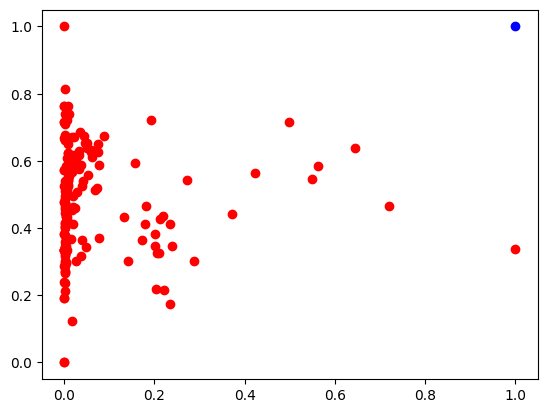

In [19]:
plt.scatter(normalizedDataset["RobustCountNormalized"].values, normalizedDataset["RobustMeanNormalized"].values, color='r')
plt.scatter(target[0], target[1], color='b')

plt.show()